In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats

In [2]:
# read data
df = pd.read_csv('data/California_Fire_Incidents.csv')
df

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,NaN,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,NaN,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN


In [3]:
# summary statistics
df.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


<AxesSubplot:xlabel='AcresBurned', ylabel='Count'>

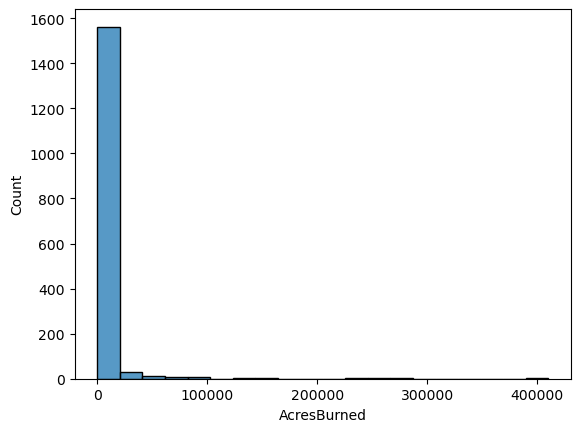

In [4]:
sns.histplot(data=df, x='AcresBurned', bins=20)

# poll: how could we improve this plot?
* log scale x axis
* log scale y axis
* consider only large fires

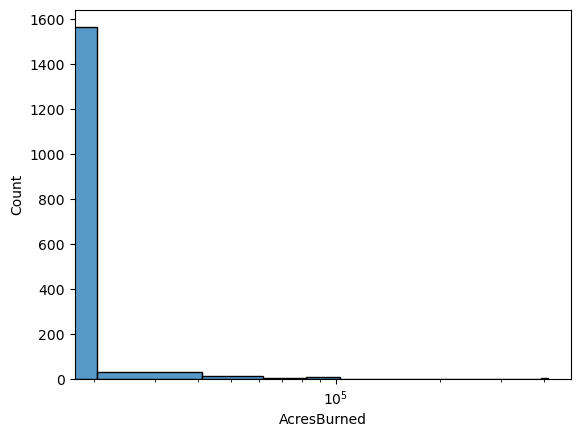

In [5]:
sns.histplot(data=df, x='AcresBurned', bins=20)
plt.xscale('log')

<AxesSubplot:xlabel='AcresBurned', ylabel='Count'>

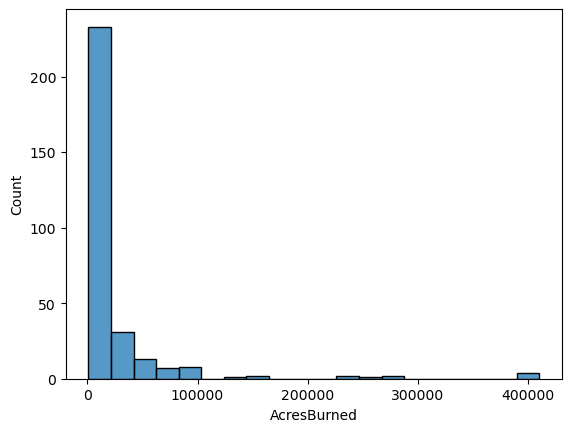

In [6]:
# plot histogram of fire size
bigfires = df[df['AcresBurned'] > 1000]
sns.histplot(data=bigfires, x='AcresBurned', bins=20)

# missing values

In [7]:
# which columns have missing values?
df.isnull().sum() / len(df)

AcresBurned             0.001834
Active                  0.000000
AdminUnit               0.000000
AirTankers              0.982885
ArchiveYear             0.000000
CalFireIncident         0.000000
CanonicalUrl            0.000000
ConditionStatement      0.826406
ControlStatement        0.932152
Counties                0.000000
CountyIds               0.000000
CrewsInvolved           0.895477
Dozers                  0.924817
Engines                 0.883252
Extinguished            0.036064
Fatalities              0.987164
Featured                0.000000
Final                   0.000000
FuelType                0.992665
Helicopters             0.948655
Injuries                0.926650
Latitude                0.000000
Location                0.000000
Longitude               0.000000
MajorIncident           0.000000
Name                    0.000000
PercentContained        0.001834
PersonnelInvolved       0.875306
Public                  0.000000
SearchDescription       0.010391
SearchKeyw

# select columns from dataset

In [8]:
# list the columns
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [9]:
# select just the columns we want: date, county, and acres burned
df = df[['Started', 'Counties', 'AcresBurned']]
df

,Started,Counties,AcresBurned
0,2013-08-17T15:25:00Z,Tuolumne,257314.0
1,2013-05-30T15:28:00Z,Los Angeles,30274.0
2,2013-07-15T13:43:00Z,Riverside,27531.0
3,2013-08-10T16:30:00Z,Placer,27440.0
4,2013-05-02T07:01:00Z,Ventura,24251.0
...,...,...,...
1631,2019-10-10T12:08:00Z,Riverside,9.0
1632,2019-06-28T15:03:04Z,Nevada,2.0
1633,2019-11-25T12:02:02Z,Yolo,NaN
1634,2019-10-22T19:20:44Z,San Diego,NaN


In [10]:
# drop the rows for which the AcresBurned column is missing
df = df.dropna(subset=['AcresBurned'])
df

,Started,Counties,AcresBurned
0,2013-08-17T15:25:00Z,Tuolumne,257314.0
1,2013-05-30T15:28:00Z,Los Angeles,30274.0
2,2013-07-15T13:43:00Z,Riverside,27531.0
3,2013-08-10T16:30:00Z,Placer,27440.0
4,2013-05-02T07:01:00Z,Ventura,24251.0
...,...,...,...
1628,2019-07-23T14:41:00Z,Butte,10.0
1629,2019-06-16T20:33:00Z,Siskiyou,10.0
1630,2019-04-30T12:20:00Z,Butte,10.0
1631,2019-10-10T12:08:00Z,Riverside,9.0


In [11]:
# convert the Started column to a datetime object
df['Started'] = pd.to_datetime(df['Started'])

# add columns for month and year
df['Month'] = df['Started'].dt.month
df['Year'] = df['Started'].dt.year
df


/var/folders/d9/7rmtq6715b16km7zjbcz7n680000gn/T/ipykernel_46437/333387758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Started'] = pd.to_datetime(df['Started'])
/var/folders/d9/7rmtq6715b16km7zjbcz7n680000gn/T/ipykernel_46437/333387758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Started'].dt.month
/var/folders/d9/7rmtq6715b16km7zjbcz7n680000gn/T/ipykernel_46437/333387758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Started,Counties,AcresBurned,Month,Year
0,2013-08-17 15:25:00+00:00,Tuolumne,257314.0,8,2013
1,2013-05-30 15:28:00+00:00,Los Angeles,30274.0,5,2013
2,2013-07-15 13:43:00+00:00,Riverside,27531.0,7,2013
3,2013-08-10 16:30:00+00:00,Placer,27440.0,8,2013
4,2013-05-02 07:01:00+00:00,Ventura,24251.0,5,2013
...,...,...,...,...,...
1628,2019-07-23 14:41:00+00:00,Butte,10.0,7,2019
1629,2019-06-16 20:33:00+00:00,Siskiyou,10.0,6,2019
1630,2019-04-30 12:20:00+00:00,Butte,10.0,4,2019
1631,2019-10-10 12:08:00+00:00,Riverside,9.0,10,2019


<AxesSubplot:xlabel='Month', ylabel='count'>

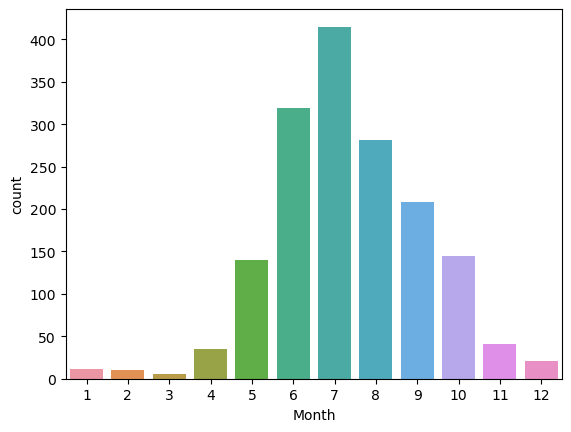

In [12]:
# plot the number of fires per month
sns.countplot(data=df, x='Month')

<AxesSubplot:xlabel='Month', ylabel='count'>

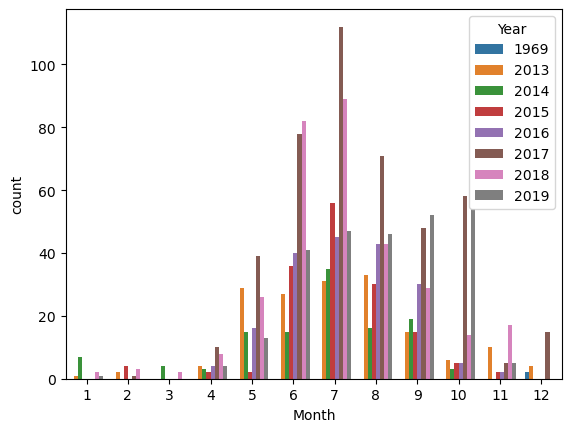

In [13]:
# compare the number of fires per month for each year
sns.countplot(data=df, x='Month', hue='Year')

In [14]:
# doh! better remove the year 1969
df = df[df['Year'] > 2000]

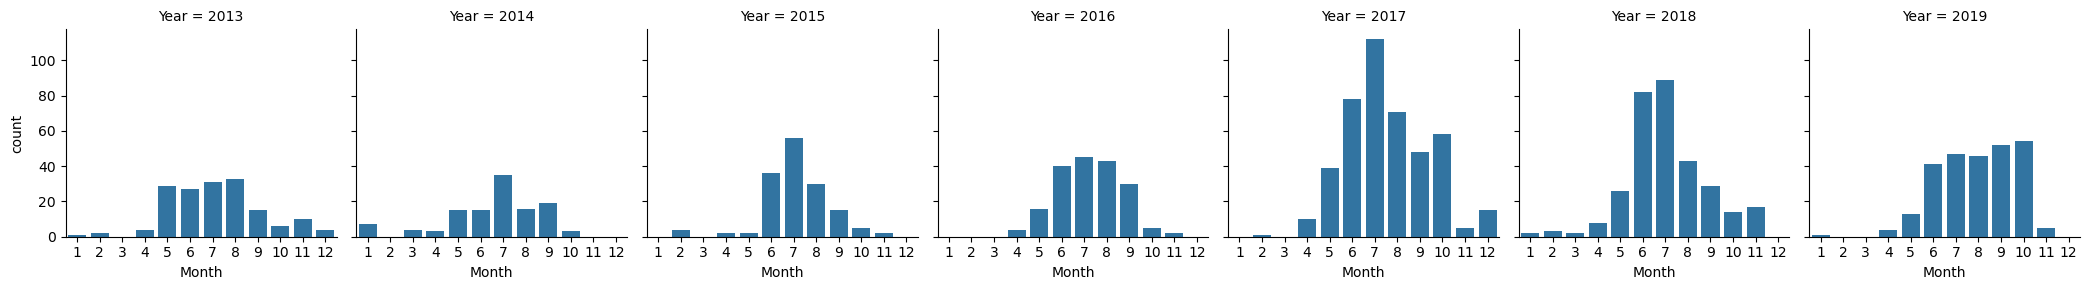

In [15]:
# or we could visualize the whole distribution separately for each year 
g = sns.FacetGrid(data=df, col='Year')
g.map(sns.countplot, 'Month', order=range(1, 13))

# how does the distribution of acres burned per month vary by month?

In [16]:
fires_bytime = df.groupby(['Year', 'Month']).sum().reset_index()
fires_bytime.sort_values('AcresBurned', ascending=False)

,Year,Month,AcresBurned
53,2018,7,2433781.0
46,2017,12,590782.0
24,2015,7,430884.0
41,2017,7,418061.0
44,2017,10,389481.0
...,...,...,...
29,2016,4,231.0
28,2015,11,79.0
58,2019,1,30.0
47,2018,1,0.0


In [17]:
# whoa, which fire was that big one?
df[df['AcresBurned'] > 2e5]

,Started,Counties,AcresBurned,Month,Year
0,2013-08-17 15:25:00+00:00,Tuolumne,257314.0,8,2013
616,2017-12-04 18:28:00+00:00,Santa Barbara,281893.0,12,2017
617,2017-12-04 18:28:00+00:00,Ventura,281893.0,12,2017
1054,2018-07-27 12:05:00+00:00,Colusa,410203.0,7,2018
1055,2018-07-27 12:05:00+00:00,Glenn,410203.0,7,2018
1056,2018-07-27 12:05:00+00:00,Lake,410203.0,7,2018
1057,2018-07-27 12:05:00+00:00,Mendocino,410203.0,7,2018
1058,2018-07-23 13:15:00+00:00,Shasta,229651.0,7,2018
1059,2018-07-23 13:15:00+00:00,Trinity,229651.0,7,2018


# question: were there four *different* big fires in 2018?
* A) yes
* B) no

In [18]:
# deduplicate the data
df = df.drop_duplicates(['Started', 'AcresBurned'])
fires_bytime = df.groupby(['Year', 'Month']).sum().reset_index()
fires_bytime

,Year,Month,AcresBurned
0,2013,1,296.0
1,2013,2,717.0
2,2013,4,459.0
3,2013,5,78445.0
4,2013,6,5353.0
...,...,...,...
62,2019,7,21628.0
63,2019,8,16430.0
64,2019,9,101511.0
65,2019,10,119814.0


In [19]:
fires_bytime.sort_values('AcresBurned', ascending=False)

,Year,Month,AcresBurned
53,2018,7,875681.0
24,2015,7,430884.0
41,2017,7,416245.0
6,2013,8,339319.0
46,2017,12,308889.0
...,...,...,...
29,2016,4,231.0
28,2015,11,79.0
58,2019,1,30.0
47,2018,1,0.0


<AxesSubplot:xlabel='Month', ylabel='AcresBurned'>

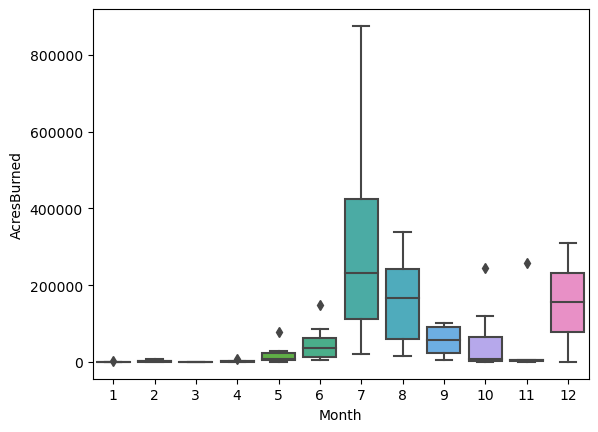

In [20]:
# box and whisker plot of acres burned per month
sns.boxplot(data=fires_bytime, x='Month', y='AcresBurned')

In [21]:
# what's up with the fires in december? why is the median so high?
df[df['Month'] == 12]

,Started,Counties,AcresBurned,Month,Year
27,2013-12-16 00:20:00+00:00,Monterey,917.0,12,2013
125,2013-12-10 02:26:00+00:00,Ventura,44.0,12,2013
129,2013-12-31 05:30:00+00:00,Santa Clara,40.0,12,2013
157,2013-12-30 11:00:00+00:00,Mendocino,15.0,12,2013
616,2017-12-04 18:28:00+00:00,Santa Barbara,281893.0,12,2017
640,2017-12-05 03:44:00+00:00,Los Angeles,15619.0,12,2017
654,2017-12-05 11:31:00+00:00,Los Angeles,6049.0,12,2017
661,2017-12-07 11:15:00+00:00,San Diego,4100.0,12,2017
725,2017-12-06 06:31:00+00:00,Los Angeles,422.0,12,2017
741,2017-12-07 13:14:00+00:00,Riverside,300.0,12,2017


In [22]:
fires_bytime

,Year,Month,AcresBurned
0,2013,1,296.0
1,2013,2,717.0
2,2013,4,459.0
3,2013,5,78445.0
4,2013,6,5353.0
...,...,...,...
62,2019,7,21628.0
63,2019,8,16430.0
64,2019,9,101511.0
65,2019,10,119814.0


# question: is something wrong with the data / our interpretation?
* missing zeros...!

# Join and Merge

In Pandas, 
* merge two dataframes on a (set of) columns key to form any combination their rows with the same key value
* join is similar, but the key must be the index

see join.ipynb demo for more details

we will use this to
* generate a dataframe of all months and years in our date range
* add structural zeros to fires dataset

In [23]:
# generate a table of months and a table of years
months = pd.DataFrame({'Month': range(1,13)})
years = pd.DataFrame({'Year': range(2013, 2020)})
months['key'] = 1
years['key'] = 1
months

,Month,key
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [24]:
# generate every possible combination of month and year
months_years = years.merge(months, on='key')
months_years

,Year,key,Month
0,2013,1,1
1,2013,1,2
2,2013,1,3
3,2013,1,4
4,2013,1,5
...,...,...,...
79,2019,1,8
80,2019,1,9
81,2019,1,10
82,2019,1,11


In [25]:
months_years = months_years.drop('key', axis=1)

In [26]:
fires_alltime = monthyear.merge(fires_bytime, on=['Year', 'Month']) 
fires_alltime

NameError: name 'monthyear' is not defined

In [ ]:
# replace NaNs with zeros
fires_alltime = fires_alltime.fillna(0)
fires_alltime

,Year,Month,AcresBurned
0,2013,1,296.0
1,2013,2,717.0
2,2013,3,0.0
3,2013,4,459.0
4,2013,5,78445.0
...,...,...,...
79,2019,8,16430.0
80,2019,9,101511.0
81,2019,10,119814.0
82,2019,11,6109.0


<AxesSubplot:xlabel='Month', ylabel='AcresBurned'>

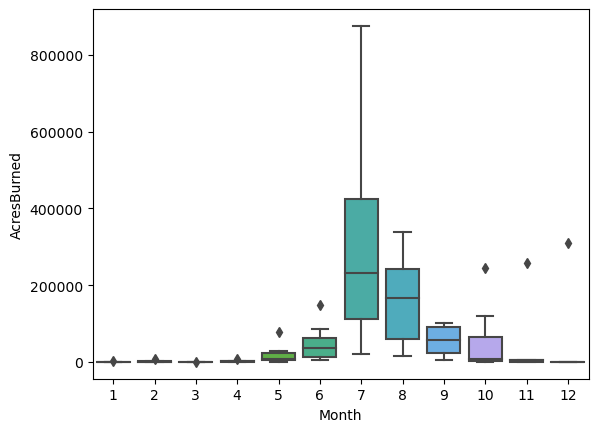

In [ ]:
# second try - box and whisker plot of acres burned per month
sns.boxplot(data=fires_alltime, x='Month', y='AcresBurned')

In [ ]:
# Rainfall and fire size

In [ ]:
# let's see if there's a relation between rainfall and fire size
